# 1. Importing Libraries 

In [98]:
#To handle data in tabular manner
import pandas as pd

#To handle mathematical operations
import numpy as np

#For visualization 
import matplotlib.pyplot as plt

#For visualization
import seaborn as sns

#Import Linear Regression
from sklearn.linear_model import LinearRegression

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split,KFold, cross_val_score

# Import zscore for scaling
from scipy.stats import zscore

from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)

#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing gridsearch CV

from sklearn.model_selection import GridSearchCV

# 2. Loading the dataset

In [2]:
df= pd.read_csv("C:/Users/Abhinav/Desktop/Fiverr/Regression/concrete.csv")

In [4]:
#Checking the shape of data
df.shape
#There are 1030 observations and 9 columns 

(1030, 9)

In [5]:
#Checking the first 10 observations 
df.head(10)
#we see there are 8 input variable and 1 output variable by the name of strength

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


1.we see there are 8 input variables cement, slag, ash, water, superplastic, coarseagg, fineagg, age and  1 output variable by the name of Stremgth

2.The dataset has only numerical input variables 

In [6]:
#Checking the first 10 observations 
df.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


# 3.Exploratory Data Quality report 

# 3.1 Univariate Analysis 

Data Types and description

In [7]:
#lets check the data types of predictor and targets 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


All the variables here are numerical there is no categorical data which we see here 

In [9]:
#1.Univariate Analysis 
df.describe().T
#For the numerical data we see the count mean,std dev quartile and max and min value

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Description of Each Independent Attribute 

Mean: of cement,is 281.2
Median: of cement,is 272.9
Mean: of slag,is 73.9
Median: of slag,is 22.0
Mean: of ash,is 54.2
Median: of ash,is 0.0
Mean: of water,is 181.6
Median: of water,is 185.0
Mean: of superplastic,is 6.2
Median: of superplastic,is 6.4
Mean: of coarseagg,is 972.9
Median: of coarseagg,is 968.0
Mean: of fineagg,is 773.6
Median: of fineagg,is 779.5
Mean: of age,is 45.7
Median: of age,is 28.0


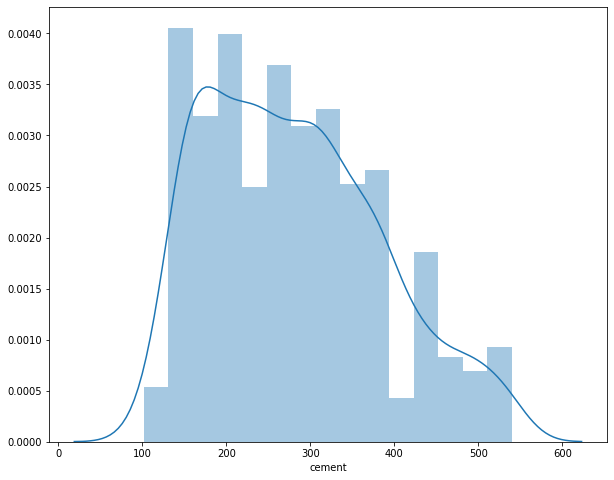

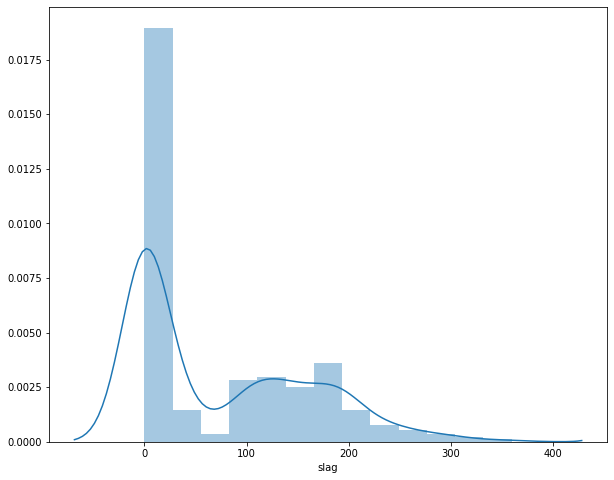

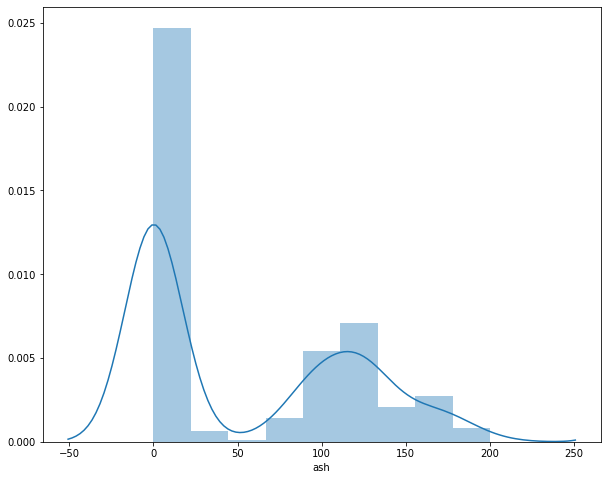

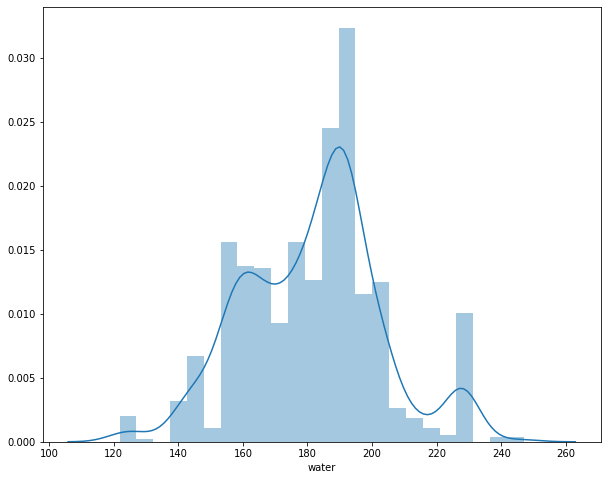

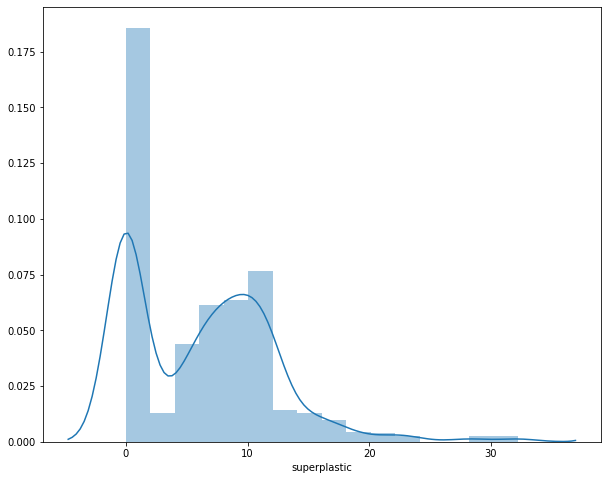

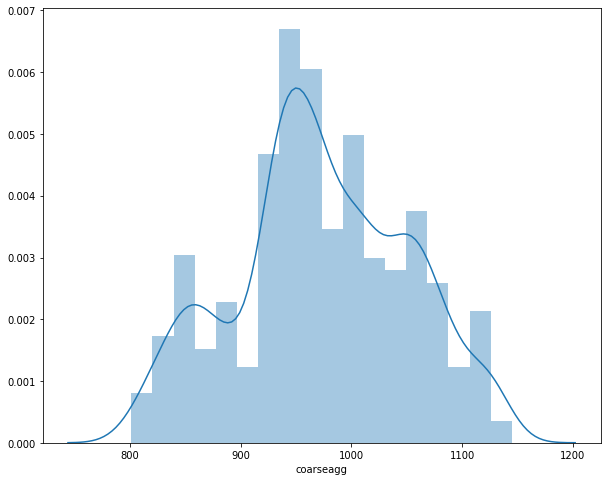

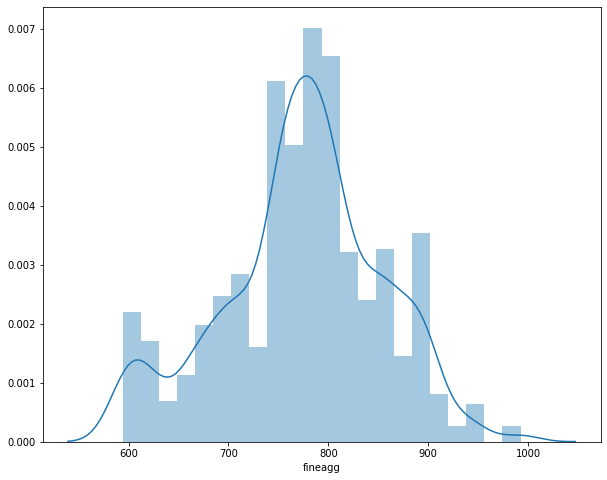

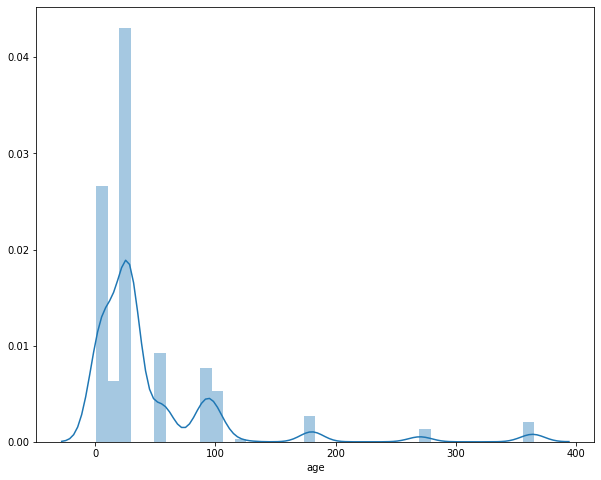

In [11]:
#Initial observations 
numerical_variables = ['cement', 'slag', 'ash', 'water','superplastic', 'coarseagg', 'fineagg','age']
for col in numerical_variables:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    print("Mean: of {},is {:.1f}".format(col,np.mean(df[col])))
    print("Median: of {},is {:.1f}".format(col,np.median(df[col])))

# Initial Observation 
#cement,slag,ash, is Right Skewed. For slag and ash lot of values are concentrated towards zero value
#Water and superplastic & fineagg: This one is left skewed 
#Courseagg & age fineagg: This one is right skewed 

# Cement

Central Tendency and Dispersion

In [14]:
print('Minimum cement: ', df['cement'].min())
print('Maximum cement: ',df['cement'].max())
print('Mean value: ', df['cement'].mean())
print('Median value: ',df['cement'].median())
print('Standard deviation: ', df['cement'].std())
print('Null values: ',df['cement'].isnull().any())
#Data is right Skewed as Mean>Median

Minimum cement:  102.0
Maximum cement:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536
Null values:  False


Quartiles and Outliers Detection

In [16]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cements: ', L_outliers)
print('Upper outliers in cements: ', U_outliers)

print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Lower outliers in cements:  -44.0625
Upper outliers in cements:  586.4375
Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


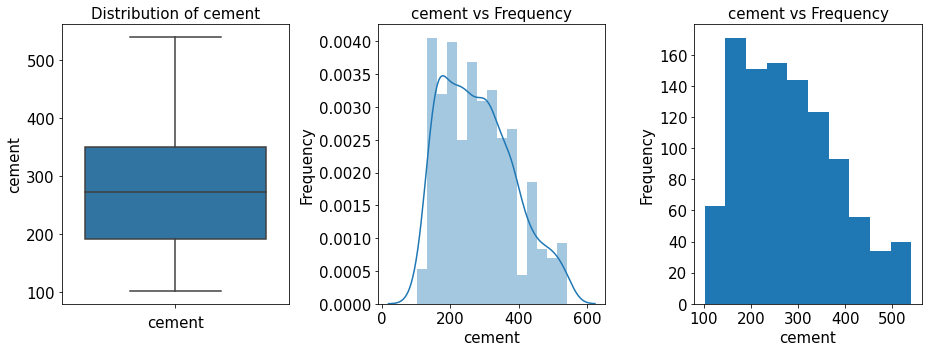

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_xlabel('cement', fontsize=15)
ax1.set_ylabel('cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('cement', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)
ax2.set_title('cement vs Frequency', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('cement', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('cement vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1.The range of cement is (minimum cement 102 to maximum cement 540).

2.Cement attribute does not have any missing values.

3.Cement is right skewed as mean > median



# Slag

Central Tendency and Dispersion

In [19]:
print('Minimum slag: ', df['slag'].min())
print('Maximum slag: ',df['slag'].max())
print('Mean value: ', df['slag'].mean())
print('Median value: ',df['slag'].median())
print('Standard deviation: ', df['slag'].std())
print('Null values: ',df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


Quartiles and Outlier Detection

In [21]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)



print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.42]['slag'].count())
print('% of Outlier in slag upper: ',round(df[df['slag']>375.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slage lower: ',round(df[df['slag']<-214.42]['slag'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375
Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slage lower:  0.0 %


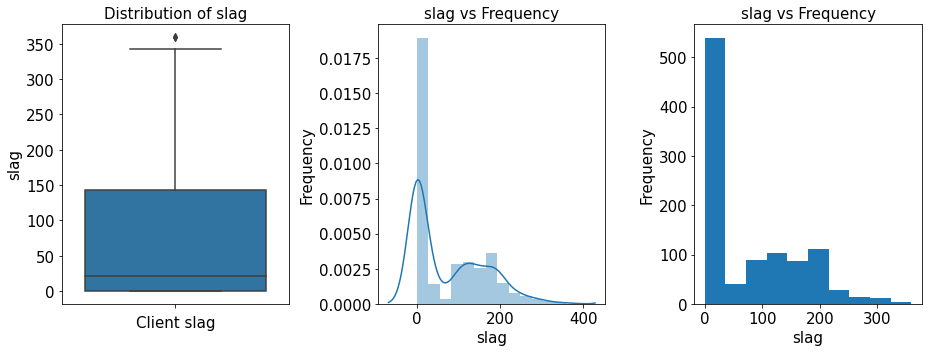

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Client slag', fontsize=15)
ax1.set_ylabel('slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['slag'],ax=ax2)
ax2.set_xlabel('slag', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)
ax2.set_title('slag vs Frequency', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['slag'])
ax3.set_xlabel('slag', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('slag vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1. The slag values varies from 0 to 359.4
2. There is lot of values concentrated near 0
3. The data is right Skewed heavily
4. There is presence of two outliers

# Ash

Central Tendency and Dispersion

In [24]:
print('Minimum ash value: ', df['ash'].min())
print('Maximum ash value: ',df['ash'].max())
print('Mean ash value: ', df['ash'].mean())
print('Median ash value: ',df['ash'].median())
print('Standard deviation: ', df['ash'].std())
print('Null values: ',df['ash'].isnull().any())

Minimum ash value:  0.0
Maximum ash value:  200.1
Mean ash value:  54.188349514563086
Median ash value:  0.0
Standard deviation:  63.99700415268794
Null values:  False


Quartiles and Outlier Detection

In [27]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

print('Number of outliers in ash upper : ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in Balance lower : ', df[df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(df[df['ash']>295.75]['ash'].count()*100/len(df)), '%')
print('% of Outlier in ash lower: ',round(df[df['ash']<-177.45]['ash'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75
Number of outliers in ash upper :  0
Number of outliers in Balance lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


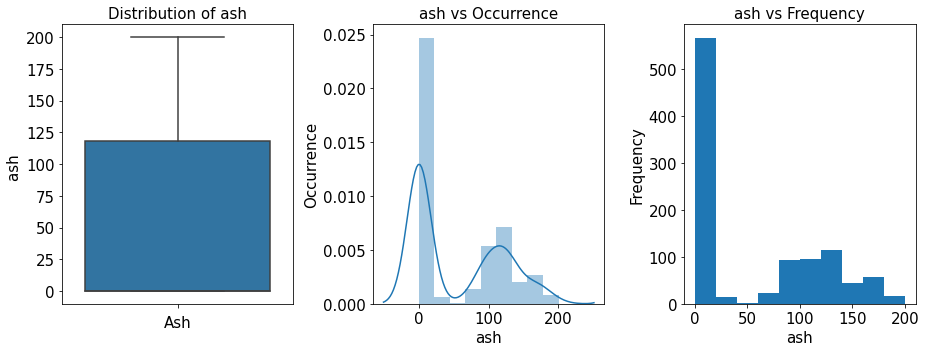

In [29]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Ash', fontsize=15)
ax1.set_ylabel('ash ', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['ash'],ax=ax2)
ax2.set_xlabel('ash', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('ash vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['ash'])
ax3.set_xlabel('ash', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('ash vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1.Ash Varies from 0 to 118.3

2.Again the data is right Skewed with lot of values concentrating around zero

3.There is no outlier present for the Ash

# Water

Central Tendency and Dispersion

In [32]:
print('Minimum value of water: ', df['water'].min())
print('Maximum value of water: ',df['water'].max())
print('Mean value of water: ', df['water'].mean())
print('Median number of water: ',df['water'].median())
print('Standard deviation: ', df['water'].std())
print('Null values: ',df['water'].isnull().any())

Minimum value of water:  121.8
Maximum value of water:  247.0
Mean value of water:  181.56728155339798
Median number of water:  185.0
Standard deviation:  21.35421856503245
Null values:  False


Quartiles and Outlier Detection

In [35]:
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers of water: ', L_outliers)
print('Upper outliers of water: ', U_outliers)

print('Number of outliers of water upper : ', df[df['water']>232.65]['water'].count())
print('Number of outliers of water lower : ', df[df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>232.65]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<124.25]['water'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Lower outliers of water:  124.25000000000001
Upper outliers of water:  232.64999999999998
Number of outliers of water upper :  4
Number of outliers of water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


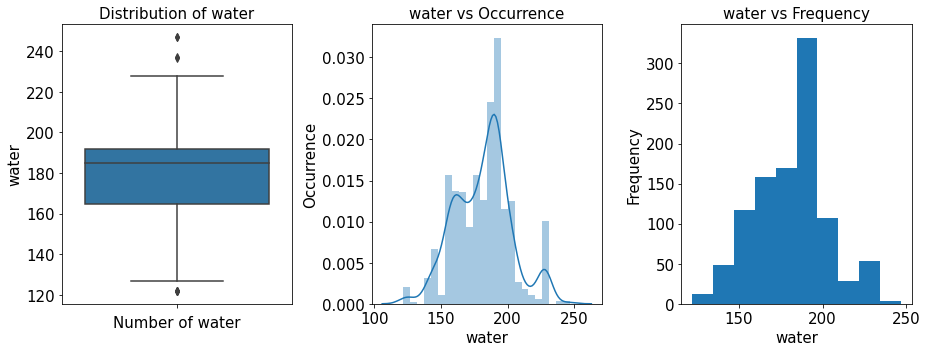

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Number of water', fontsize=15)
ax1.set_ylabel('water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['water'],ax=ax2)
ax2.set_xlabel('water', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('water vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['water'])
ax3.set_xlabel('water', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('water vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1.The water concentration varies from 121.8 to 247 

2.There is presence of some outlier

3.The data looks symmetric with small skewness

# Superplastic

Central Tendency and Dispersion

In [37]:
print('Minimum value of superplastic ', df['superplastic'].min())
print('Maximum value of superplastic ',df['superplastic'].max())
print('Mean value of superplastic ', df['superplastic'].mean())
print('Median value of superplastic ',df['superplastic'].median())
print('Standard deviation: ', df['superplastic'].std())
print('Null values: ',df['superplastic'].isnull().any())

Minimum value of superplastic  0.0
Maximum value of superplastic  32.2
Mean value of superplastic  6.204660194174756
Median value of superplastic  6.4
Standard deviation:  5.973841392485508
Null values:  False


Quartiles and Outlier Detection

In [40]:
Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

print('Number of outliers in superplastic upper : ', df[df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', df[df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(df[df['superplastic']>25.5]['superplastic'].count()*100/len(df)), '%')
print('% of Outlier in superplastic lower: ',round(df[df['superplastic']<-15.3]['superplastic'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5
Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


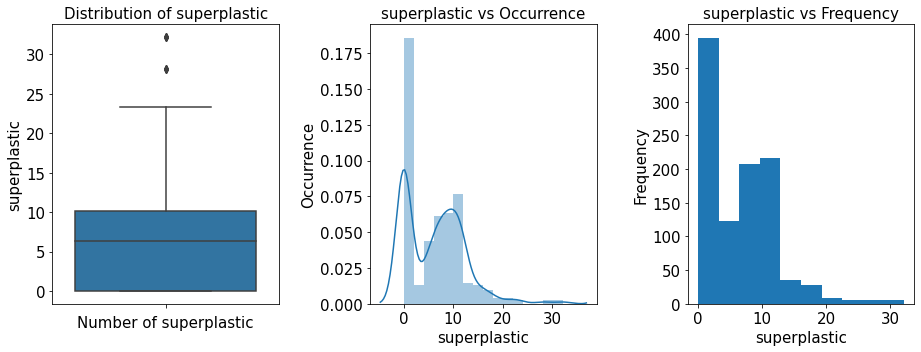

In [41]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Number of superplastic', fontsize=15)
ax1.set_ylabel('superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['superplastic'],ax=ax2)
ax2.set_xlabel('superplastic', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('superplastic vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['superplastic'])
ax3.set_xlabel('superplastic', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('superplastic vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1. The values of superplastic varies from 0 to 32.2
2. There are outliers present in the superplastic
3.There are lot of values which are concentrated near 0

# Coarse Aggregate

Central Tendency and Dispersion

In [43]:
print('Minimum value of Coarse Aggregate: ', df['coarseagg'].min())
print('Maximum value of Coarse Aggregate: ',df['coarseagg'].max())
print('Mean value of Coarse Aggregate: ', df['coarseagg'].mean())
print('Median value of Coarse Aggregate: ',df['coarseagg'].median())
print('Standard deviation: ', df['coarseagg'].std())
print('Null values: ',df['coarseagg'].isnull().any())

Minimum value of Coarse Aggregate:  801.0
Maximum value of Coarse Aggregate:  1145.0
Mean value of Coarse Aggregate:  972.918932038835
Median value of Coarse Aggregate:  968.0
Standard deviation:  77.75395396672087
Null values:  False


Quartiles and Outlier Detection

In [45]:
Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

print('Number of outliers in coarseagg upper : ', df[df['coarseagg']>1175]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseagg']<785]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseagg']>1175]['coarseagg'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseagg']<785]['coarseagg'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002
Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


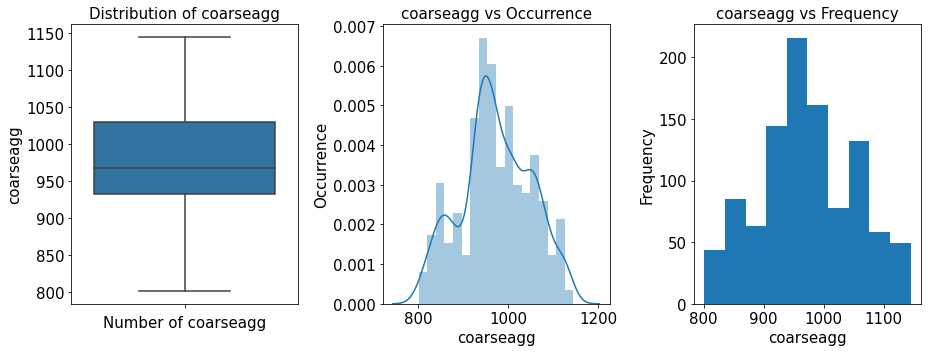

In [46]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Number of coarseagg', fontsize=15)
ax1.set_ylabel('coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_xlabel('coarseagg', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('coarseagg vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coarseagg'])
ax3.set_xlabel('coarseagg', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('coarseagg vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1. The Data varies from 801 to 1145
2. The distribution will looks normally distributed 

# Fine Aggregate

Central Tendency and Dispersion

In [47]:
print('Minimum value of Fine Aggregate: ', df['fineagg'].min())
print('Maximum value of Fine Aggregate: ',df['fineagg'].max())
print('Mean value of Fine Aggregate: ', df['fineagg'].mean())
print('Median value of Fine Aggregate: ',df['fineagg'].median())
print('Standard deviation: ', df['fineagg'].std())
print('Null values: ',df['fineagg'].isnull().any())

Minimum value of Fine Aggregate:  594.0
Maximum value of Fine Aggregate:  992.6
Mean value of Fine Aggregate:  773.5804854368932
Median value of Fine Aggregate:  779.5
Standard deviation:  80.17598014240443
Null values:  False


Quartiles and Outlier Detection

In [51]:
Q1=df['fineagg'].quantile(q=0.25)
Q3=df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

print('Number of outliers in fineagg upper : ', df[df['fineagg']>963]['fineagg'].count())
print('Number of outliers in fineagg lower : ', df[df['fineagg']<591]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(df[df['fineagg']>963]['fineagg'].count()*100/len(df)), '%')
print('% of Outlier in fineagg lower: ',round(df[df['fineagg']<591]['fineagg'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575
Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


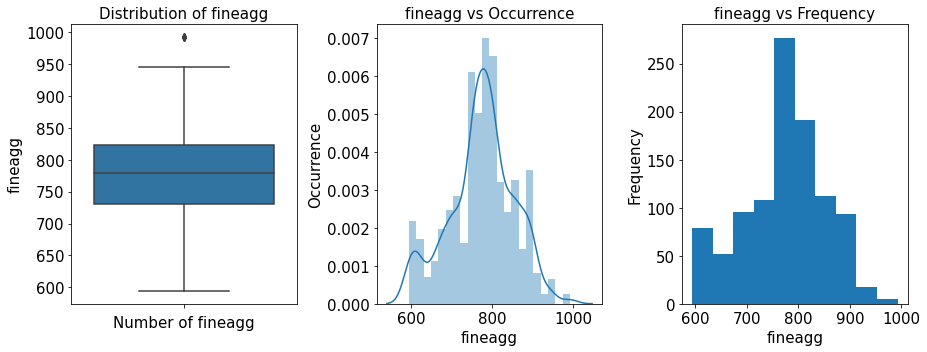

In [50]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Number of fineagg', fontsize=15)
ax1.set_ylabel('fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fineagg'],ax=ax2)
ax2.set_xlabel('fineagg', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('fineagg vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['fineagg'])
ax3.set_xlabel('fineagg', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('fineagg vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1. The Data varies from 594 to 992.6 
2. The distribution  looks normally distributed 

# Age

Central Tendency and Dispersion

In [52]:
print('Minimum value days ', df['age'].min())
print('Maximum value of days: ',df['age'].max())
print('Mean value of days: ', df['age'].mean())
print('Median value of days: ',df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())

Minimum value days  1
Maximum value of days:  365
Mean value of days:  45.662135922330094
Median value of days:  28.0
Standard deviation:  63.16991158103279
Null values:  False


Quartiles and Outlier Detection

In [54]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Lower outliers in age:  -66.5
Upper outliers in age:  129.5
Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


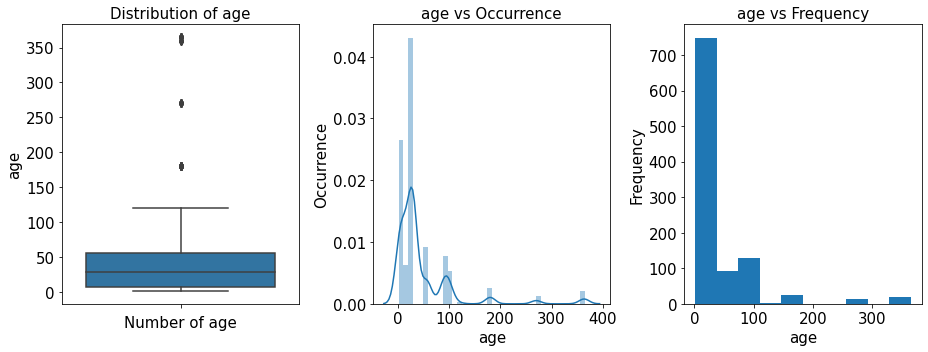

In [55]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Number of age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('age vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

1. The Data varies from 1 to 365
2. There is lot of values between 1 to 100

# Strength

Central Tendency and Dispersion

In [58]:
print('Minimum value Strength ', df['strength'].min())
print('Maximum value of Strength: ',df['strength'].max())
print('Mean value of Strength: ', df['strength'].mean())
print('Median value of Strength: ',df['strength'].median())
print('Standard deviation: ', df['strength'].std())
print('Null values: ',df['strength'].isnull().any())

Minimum value Strength  2.33
Maximum value of Strength:  82.6
Mean value of Strength:  35.81796116504854
Median value of Strength:  34.445
Standard deviation:  16.70574196191251
Null values:  False


Quartiles and Outlier Detection

In [60]:
Q1=df['strength'].quantile(q=0.25)
Q3=df['strength'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in strength: ', L_outliers)
print('Upper outliers in strength: ', U_outliers)

print('Number of outliers in strength upper : ', df[df['strength']>79.77]['strength'].count())
print('Number of outliers in strength lower : ', df[df['strength']<-9.92]['strength'].count())
print('% of Outlier in strength upper: ',round(df[df['strength']>79.77]['strength'].count()*100/len(df)), '%')
print('% of Outlier in strength lower: ',round(df[df['strength']<-9.92]['strength'].count()*100/len(df)), '%')

1st Quartile (Q1) is:  23.709999999999997
3st Quartile (Q3) is:  46.135000000000005
Lower outliers in strength:  -9.927500000000013
Upper outliers in strength:  79.77250000000001
Number of outliers in strength upper :  4
Number of outliers in strength lower :  0
% of Outlier in strength upper:  0.0 %
% of Outlier in strength lower:  0.0 %


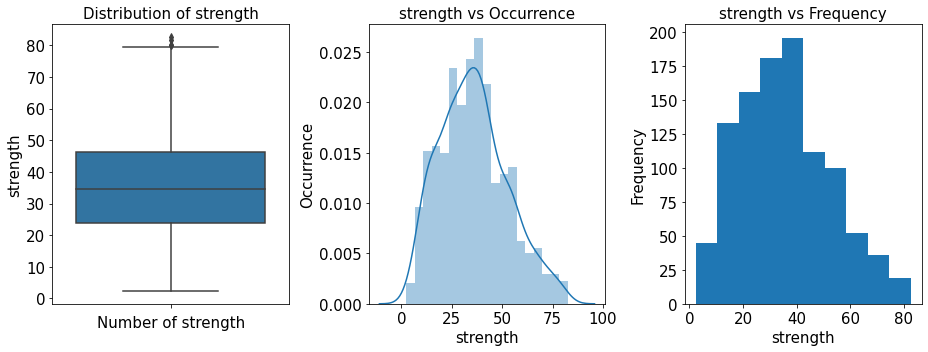

In [61]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='strength',data=df,orient='v',ax=ax1)
ax1.set_xlabel('Number of strength', fontsize=15)
ax1.set_ylabel('strength', fontsize=15)
ax1.set_title('Distribution of strength', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['strength'],ax=ax2)
ax2.set_xlabel('strength', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('strength vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['strength'])
ax3.set_xlabel('strength', fontsize=15)
ax3.set_ylabel('Frequency', fontsize=15)
ax3.set_title('strength vs Frequency', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The distribution looks normally distributed 

# 3.2 Multi-Variate Analysis

PairPlot

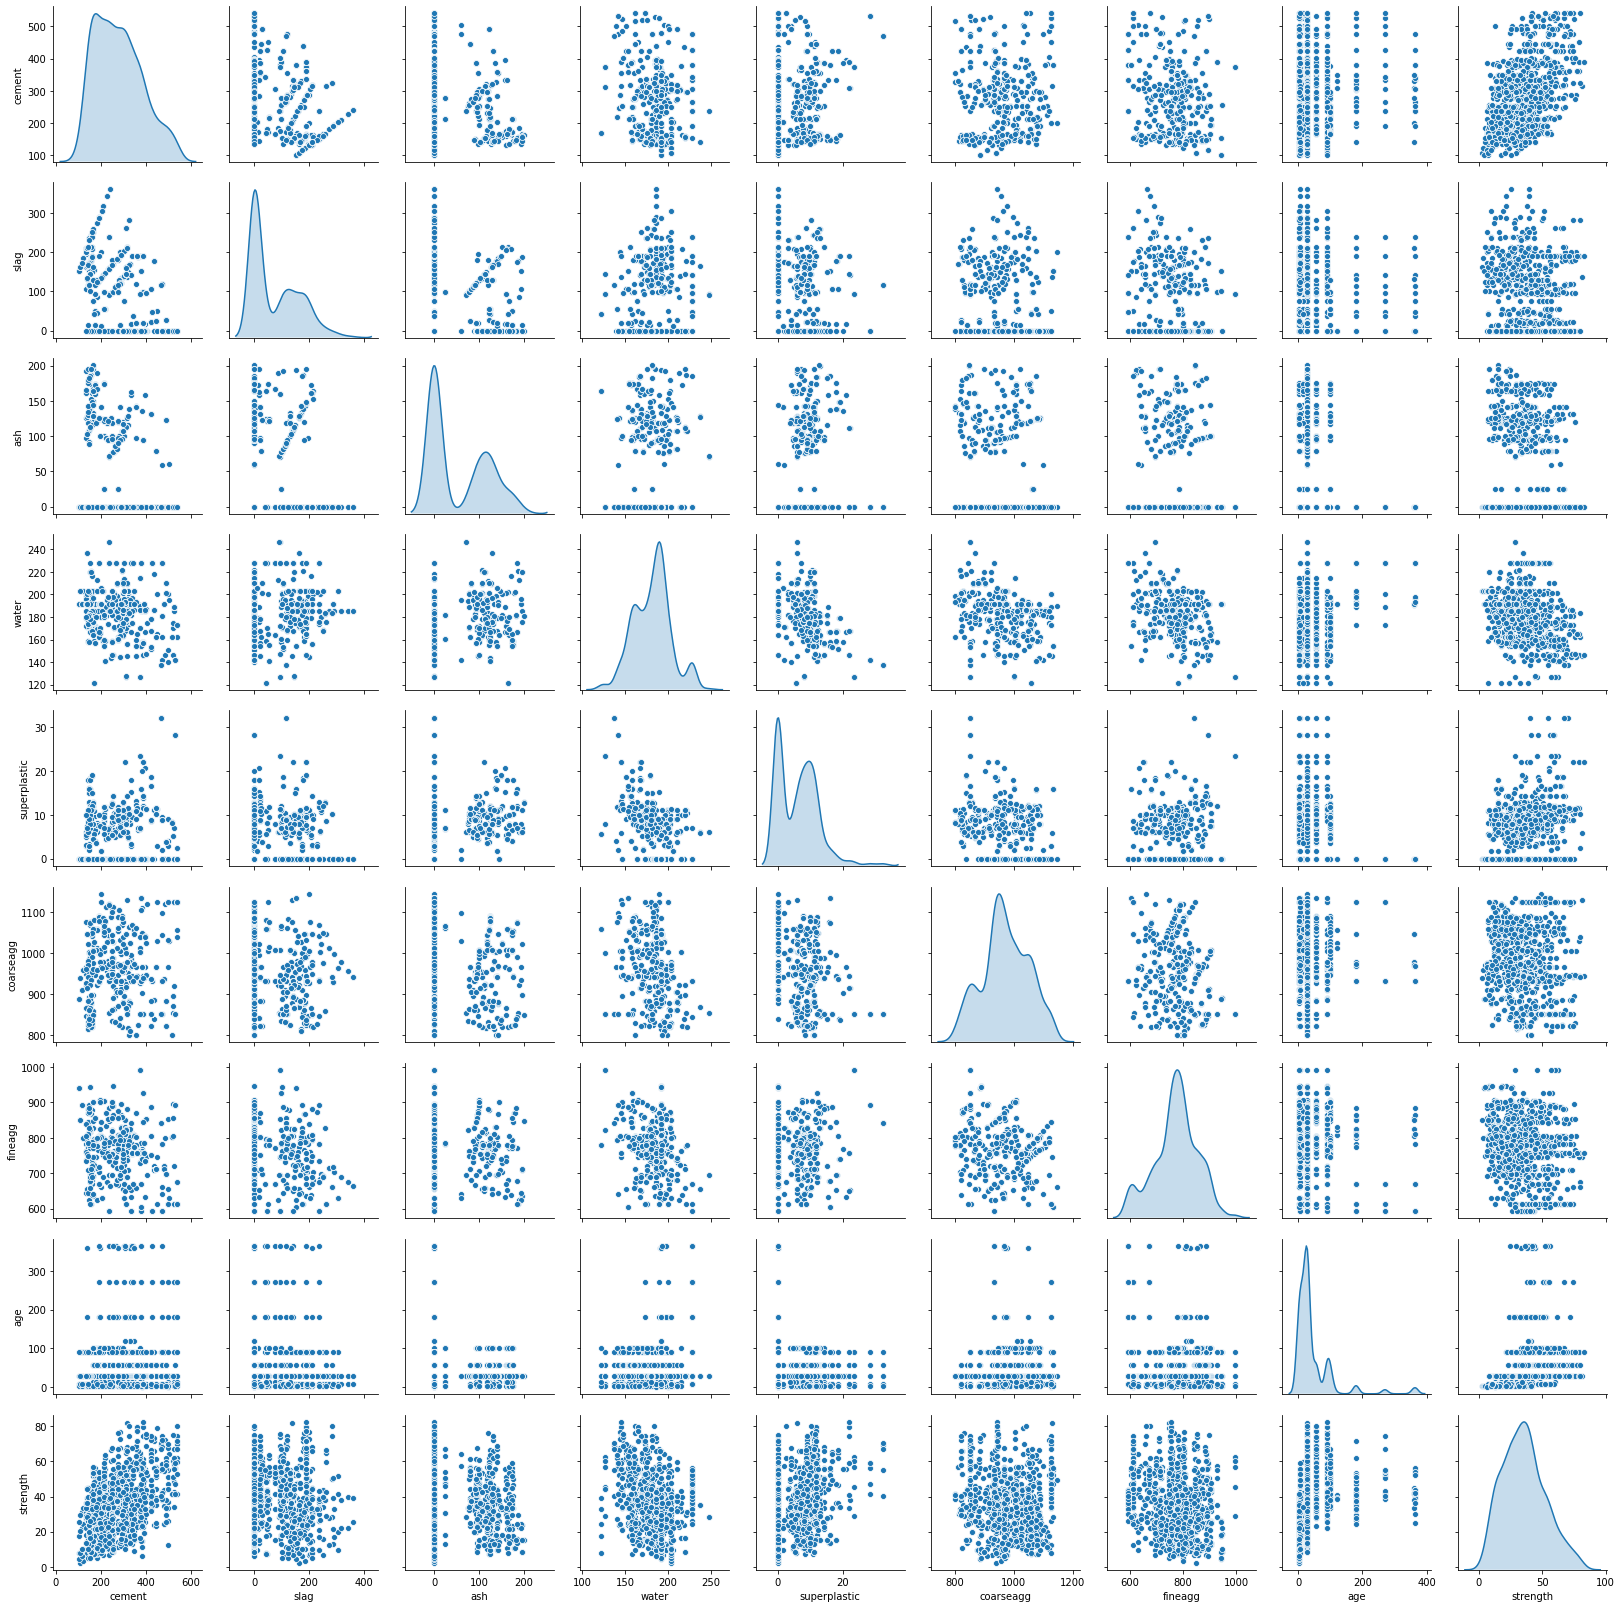

In [66]:
# pairplot- plot 
sns.pairplot(df, diag_kind='kde')

#Except for Strength and cement has some week relationship
Other predictors doesn't have much relationship with cement

# Correlation Plot

In [71]:
#Correlation Matrix 
corr = df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


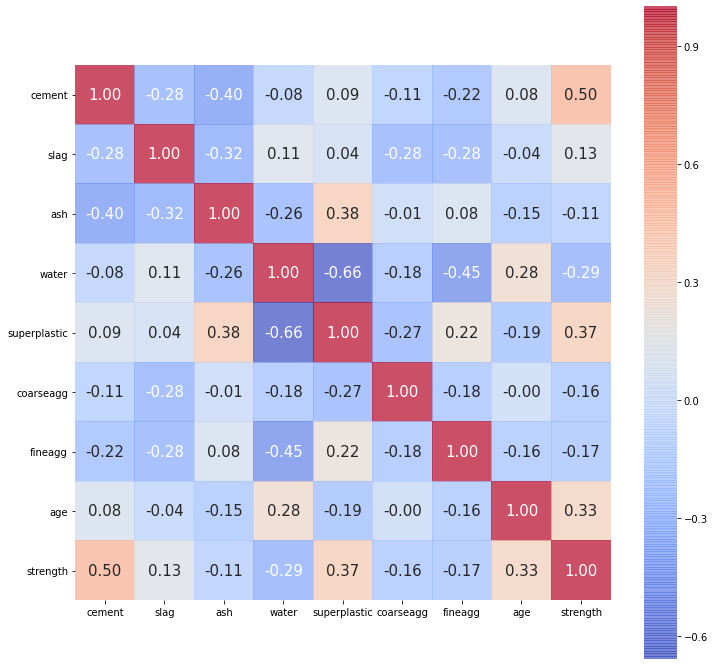

In [72]:
#Correlation Matrix of Numerical features
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, yticklabels= df.columns, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

#We See cement,water,superplastic,age has some week linear relationship with strength

# 4.Feature Engineering 

Scaling the data

We Saw our data has various ranges for example coarseagg values being in thousands and water values being in 200's. We also saw outliers being present in the dataset hence it is important to scale the data we would we using standardization (z-score normalization) method to transform the data

In [78]:
df_scaled = df.apply(zscore)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [79]:
X = df_scaled.iloc[:,0:8]
y= df_scaled.iloc[:,8]

In [81]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


# 5.Splitting the Data

In [83]:
#Data-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(721, 8) (721,)
(309, 8) (309,)


# 6.Checking on complexity of Linear Model

In [90]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
# performance on train data
print('Performance on training data using LR:',lr_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LR:',lr_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR=r2_score(y_test, y_pred)
print('R-Square value using LR: ',acc_LR)
print('MSE: ',mean_squared_error(y_test, y_pred))

Performance on training data using LR: 0.6245192848718453
Performance on testing data using LR: 0.584797137584011
R-Square value using LR:  0.584797137584011
MSE:  0.40217460320478404


In [94]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  #Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
  
    print("\n")
  
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [95]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.4275249293705311
R2 score of training set is 0.8194517773476421


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.4672462251896488
R2 score of test set is 0.7746086214533277


In [96]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.2680593002705148
R2 score of training set is 0.929020638405742


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.35493714358503103
R2 score of test set is 0.8699385484225817


In [97]:
create_polynomial_regression_model(4)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.13222224533467974
R2 score of training set is 0.9827305150425485


The model performance for the test set
-------------------------------------------
RMSE of test set is 98.57019216656307
R2 score of test set is -10029.830766384506


From Bi-variate analysis we have already seen that there is not a predictor having non-linear variation, we also see 
from the model above that model is overfitting, increasing the complexity will only increase the variance hence keeping it linear

# 7. Model Building 

7.1 Decision Tree Regression

In [152]:
DT_Model = DecisionTreeRegressor(random_state = 42)
DT_Model.fit(X_train, y_train)
#print('R-Square of Decision Tree Regressor on training set: {:.2f}'.format(DT_Model.score(X_train, y_train)))
#print('R-Square of Decision Tree Regressor on test set: {:.2f}'.format(DT_Model.score(X_test, y_test)))
#print('MSE of Decision Tree Regressor on test set: {:.2f}'.format(mean_squared_error(y_test, DT_Model.predict(X_test))))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

We see there is overfitting happening in the model need to optimize the model

In [110]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(DT_Model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.322970
slag          0.064921
ash           0.022545
water         0.077046
superplastic  0.089593
coarseagg     0.029091
fineagg       0.024999
age           0.368835


So, cement, age and superplastic are significant attributes.
Here, ash, coarseagg, fineagg,slag,ash & water are the less significant variable.
These will impact less to the strength column. This we have seen in pairplot also.

DT: R-Square score was 86.608381 with variation of (+/- 3.904557) 


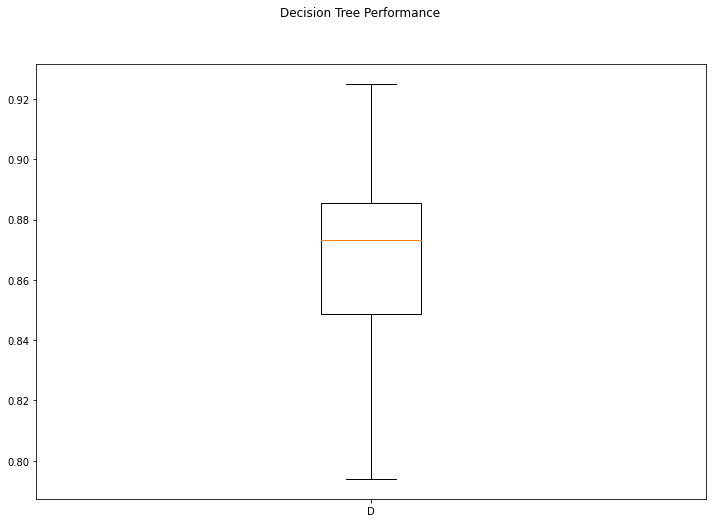

In [132]:
num_folds = 10
names ='DT'
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results_DT = cross_val_score(DT_Model, X, y, cv=kfold,n_jobs=-1)
msg = "%s: R-Square score was %f with variation of (+/- %f) " % (names, 100*cv_results_DT.mean(), 100*cv_results_DT.std())
print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Decision Tree Performance")
ax = fig.add_subplot(1,1,1)
plt.boxplot(cv_results_DT)
ax.set_xticklabels(names)
plt.show()

Let's use Gridsearch to optimize the parameters 

In [158]:
kfold = KFold(n_splits=10, random_state= 42)
maxdepth = [None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]
minsampleaf = range(1,7)
param_grid = {
    'max_depth' : maxdepth,
    'min_samples_leaf' : minsampleaf
}
dt_cv= GridSearchCV(estimator=DT_Model, param_grid=param_grid,cv=kfold)
dt_cv.fit(X,y)
# Best score and best parameters
print('-------Best score----------')
print(dt_cv.best_score_ * 100.0)
print('-------Best params----------')
print(dt_cv.best_params_)

-------Best score----------
86.90937096073597
-------Best params----------
{'max_depth': 15, 'min_samples_leaf': 1}


7.2 Random Forrest Regressor 

In [118]:
RF_Model = RandomForestRegressor(random_state = 42)
RF_Model.fit(X_train, y_train)
print('R-Square of RandomForest Regressor on training set: {:.2f}'.format(RF_Model.score(X_train, y_train)))
print('R-Square of RandomForest Regressor on test set: {:.2f}'.format(RF_Model.score(X_test, y_test)))
print('MSE of RandomForest Regressor on test set: {:.2f}'.format(mean_squared_error(y_test, RF_Model.predict(X_test))))

R-Square of RandomForest Regressor on training set: 0.98
R-Square of RandomForest Regressor on test set: 0.89
MSE of RandomForest Regressor on test set: 0.11


C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFR: R-Square score was 90.776775 with variation of (+/- 2.231705) 


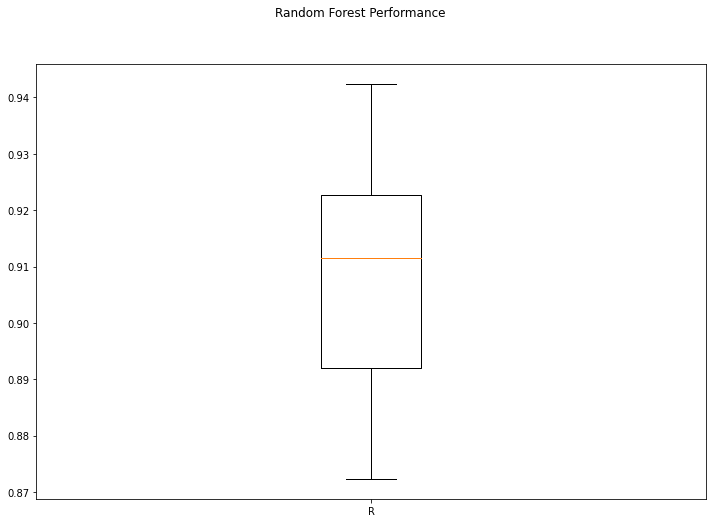

In [134]:
num_folds = 10
names ='RFR'
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results_RF = cross_val_score(RF_Model, X, y, cv=kfold,n_jobs=-1)
msg = "%s: R-Square score was %f with variation of (+/- %f) " % (names, 100*cv_results_RF.mean(), 100*cv_results_RF.std())
print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Random Forest Performance")
ax = fig.add_subplot(1,1,1)
plt.boxplot(cv_results_RF)
ax.set_xticklabels(names)
plt.show()

In [150]:
from time import time
kfold = KFold(n_splits=10, random_state= 42)
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=kfold, verbose=0,n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = gsc.fit(X, y)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(gsc.best_score_ * 100.0)
print('-------Best params----------')
print(gsc.best_params_)

RFC grid search took 14.280 seconds
-------Best score----------
86.65728921459788
-------Best params----------
{'max_depth': 6, 'n_estimators': 1000}


7.3 Gradient Boosting Regressor

In [123]:
GB = GradientBoostingRegressor(random_state = 42)
GB.fit(X_train, y_train)
print('R-Square of Gradient Boosting Regressor on training set: {:.2f}'.format(GB.score(X_train, y_train)))
print('R-Square of Gradient Boosting Regressor on test set: {:.2f}'.format(GB.score(X_test, y_test)))
print('MSE of Gradient Boosting Regressor on test set: {:.2f}'.format(mean_squared_error(y_test, GB.predict(X_test))))

R-Square of Gradient Boosting Regressor on training set: 0.95
R-Square of Gradient Boosting Regressor on test set: 0.90
MSE of Gradient Boosting Regressor on test set: 0.10


GB: R-Square score was 90.593869 with variation of (+/- 1.984171) 


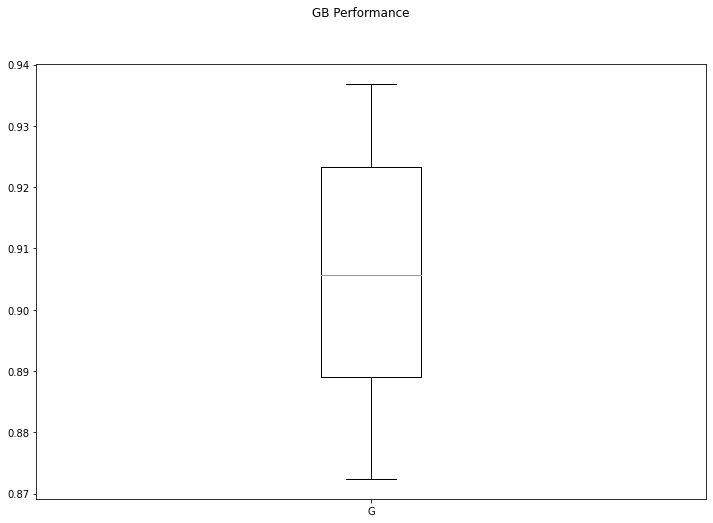

In [135]:
num_folds = 10
names ='GB'
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results_GB = cross_val_score(GB, X, y, cv=kfold,n_jobs=-1)
msg = "%s: R-Square score was %f with variation of (+/- %f) " % (names, 100*cv_results_GB.mean(), 100*cv_results_GB.std())
print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("GB Performance")
ax = fig.add_subplot(1,1,1)
plt.boxplot(cv_results_GB)
ax.set_xticklabels(names)
plt.show()

7.4 Ada Boosting Regressor

In [125]:
AB_model=AdaBoostRegressor(random_state = 42)
AB_model.fit(X_train, y_train)
print('R-Square of Ada Boosting Regressor on training set: {:.2f}'.format(AB_model.score(X_train, y_train)))
print('R-Square of Ada Boosting Regressor on test set: {:.2f}'.format(AB_model.score(X_test, y_test)))
print('MSE of Ada Boosting Regressor on test set: {:.2f}'.format(mean_squared_error(y_test, AB_model.predict(X_test))))

R-Square of Ada Boosting Regressor on training set: 0.82
R-Square of Ada Boosting Regressor on test set: 0.76
MSE of Ada Boosting Regressor on test set: 0.23


AD: R-Square score was 77.938725 with variation of (+/- 2.932202) 


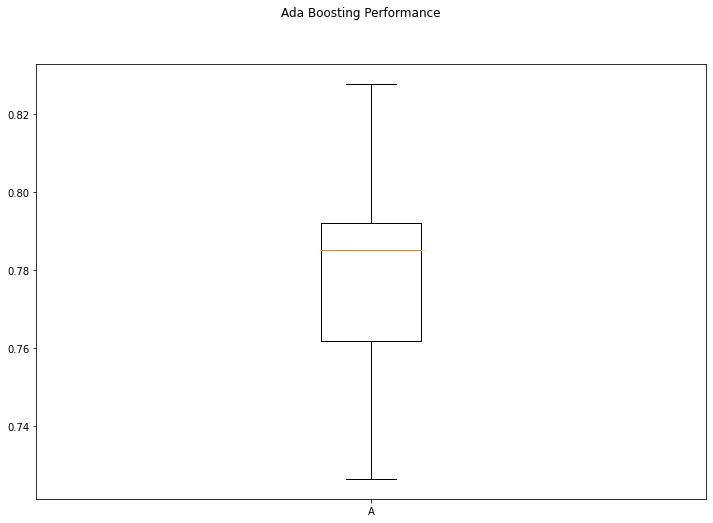

In [136]:
num_folds = 10
names ='AD'
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results_AD = cross_val_score(AB_model, X, y, cv=kfold,n_jobs=-1)
msg = "%s: R-Square score was %f with variation of (+/- %f) " % (names, 100*cv_results_AD.mean(), 100*cv_results_AD.std())
print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Ada Boosting Performance")
ax = fig.add_subplot(1,1,1)
plt.boxplot(cv_results_AD)
ax.set_xticklabels(names)
plt.show()

7.5 Bagging Regressor

In [137]:
BG_model=BaggingRegressor(random_state=42)
BG_model.fit(X_train, y_train)
print('R-Square of Bagging Regressor on training set: {:.2f}'.format(BG_model.score(X_train, y_train)))
print('R-Square of Bagging Regressor on test set: {:.2f}'.format(BG_model.score(X_test, y_test)))
print('MSE of Bagging Regressor on test set: {:.2f}'.format(mean_squared_error(y_test, BG_model.predict(X_test))))

R-Square of Bagging Regressor on training set: 0.98
R-Square of Bagging Regressor on test set: 0.88
MSE of Bagging Regressor on test set: 0.11


BG: R-Square score was 90.612570 with variation of (+/- 2.442547) 


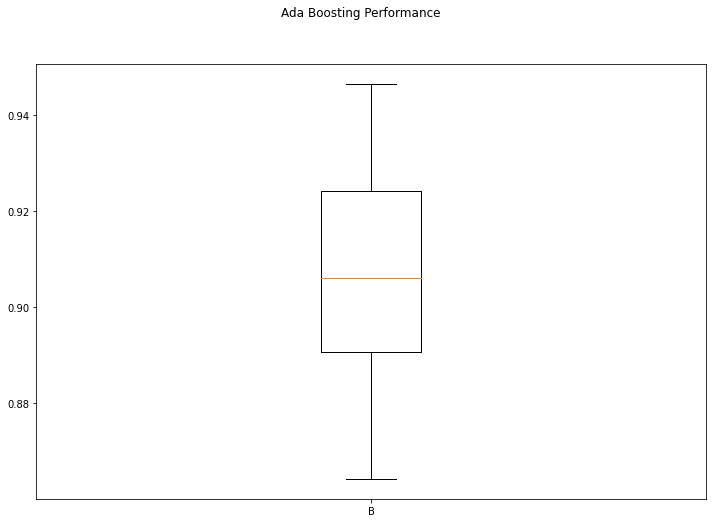

In [138]:
num_folds = 10
names ='BG'
kfold = KFold(n_splits=num_folds, random_state=42)
cv_results_BG = cross_val_score(BG_model, X, y, cv=kfold,n_jobs=-1)
msg = "%s: R-Square score was %f with variation of (+/- %f) " % (names, 100*cv_results_BG.mean(), 100*cv_results_BG.std())
print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Ada Boosting Performance")
ax = fig.add_subplot(1,1,1)
plt.boxplot(cv_results_BG)
ax.set_xticklabels(names)
plt.show()

# 8 Summary of Model Performance 

In [146]:
#Summary of Model Performance 
model_names = ['Decision Tree','RFR','Gradient Boost','Ada Boosting Regressor','Bagging_Regressor']
Train_R_Square=[DT_Model.score(X_train, y_train),RF_Model.score(X_train, y_train),GB.score(X_train, y_train),AB_model.score(X_train, y_train),BG_model.score(X_train, y_train)]
Test_R_Square =[DT_Model.score(X_test, y_test),RF_Model.score(X_test, y_test),GB.score(X_test, y_test),AB_model.score(X_test, y_test),BG_model.score(X_test, y_test)]
CV_Score =[cv_results_DT.mean(),cv_results_RF.mean(),cv_results_GB.mean(),cv_results_AD.mean(),cv_results_BG.mean()]
data = {'Model_Names':model_names,'Training_data_R_Square':Train_R_Square,'Testing_R_Square':Test_R_Square,'CV_Mean_Score':CV_Score}
Summary = pd.DataFrame(data)
Summary

,Model_Names,Training_data_R_Square,Testing_R_Square,CV_Mean_Score
0,Decision Tree,0.994915,0.835497,0.866084
1,RFR,0.976896,0.885508,0.907768
2,Gradient Boost,0.948830,0.899140,0.905939
3,Ada Boosting Regressor,0.821290,0.757921,0.779387
4,Bagging_Regressor,0.977550,0.884138,0.906126


In [ ]:
https://github.com/swethalahari/Determining-Concrete-Strength/blob/master/Feature_Engg-Copy1-1-checkpoint.ipynb
https://github.com/LaxmiChaudhary/Modeling-of-strength-of-high-performance-concrete-using-Machine-Learning/blob/master/FMT%20on%20concrete%20dataset.ipynb